<a href="https://colab.research.google.com/github/SaurabhChakravorty/Watch-at-your-own-risk/blob/master/PyTorch_Basics_Saurabh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Torch basics



In [ ]:
import torch
import numpy as np
print(torch.rand(3))

tensor([0.8102, 0.3774, 0.7459])


In [ ]:
if torch.cuda.is_available():
 device = torch.device("cuda")

#### Importing pytorch_xla for TPU

In [59]:
VERSION = "20200325"  #@param ["1.5" , "20200325", "nightly"]
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py
!python pytorch-xla-env-setup.py --version $VERSION

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4264  100  4264    0     0  65600      0 --:--:-- --:--:-- --:--:-- 65600
Updating TPU and VM. This may take around 2 minutes.
Updating TPU runtime to pytorch-dev20200325 ...
Uninstalling torch-1.5.0a0+d6149a7:
  Successfully uninstalled torch-1.5.0a0+d6149a7
Uninstalling torchvision-0.6.0a0+3c254fb:
  Successfully uninstalled torchvision-0.6.0a0+3c254fb
Copying gs://tpu-pytorch/wheels/torch-nightly+20200325-cp36-cp36m-linux_x86_64.whl...
\ [1 files][ 83.4 MiB/ 83.4 MiB]                                                
Operation completed over 1 objects/83.4 MiB.                                     
Copying gs://tpu-pytorch/wheels/torch_xla-nightly+20200325-cp36-cp36m-linux_x86_64.whl...
\ [1 files][114.5 MiB/114.5 MiB]                                                
Operation completed over 1 objects/114.5 MiB.               

In [2]:
# imports pytorch
import torch
# imports the torch_xla package
import torch_xla
import torch_xla.core.xla_model as x

In [4]:
# Creating a tensor on the second Cloud TPU core
second_dev = x.xla_device(n=2, devkind='TPU')
t2 = torch.zeros(3, 3, device = second_dev)
print(t2)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], device='xla:2')


#### Some very basics torch computations

In [ ]:
# Making n*n dimensionla pytorch tensor
x = torch.empty(3,1,1)
#print(x)

In [ ]:
x = torch.ones(2,2,dtype=torch.float16)
print(x.size())

torch.Size([2, 2])


In [ ]:
x = torch.tensor([2.5,0.1])
print(x)

tensor([2.5000, 0.1000])


In [ ]:
x = torch.rand(2,2)
y = torch.rand(2,2)
z = x + y
print(z)

tensor([[0.7209, 1.1255],
        [0.5529, 0.9585]])


In [ ]:
import numpy as np

a = torch.ones(5, device=device)
print(a)
# numpy doesnot supports GPU
a = a.to("cpu")
b = a.numpy()
print(b)
# Underscore alters the original value in location
a.add_(1)
print("a :",a)
print("b :",b)



tensor([1., 1., 1., 1., 1.], device='cuda:0')
[1. 1. 1. 1. 1.]
a : tensor([2., 2., 2., 2., 2.])
b : [2. 2. 2. 2. 2.]


In [ ]:
# adding torch to numpy 
a + b

tensor([4., 4., 4., 4., 4.])

### Computational graphs using AutoGrad

 One interesting property of pytorch is allows computational graph to be implemented using AutoGrad functionality



In [ ]:
x = torch.rand(3, requires_grad=True,device=device)

y = x + 2
print("x:",x)  # Input 
print("y:",y)  # Forward

z = y        
#z = y.mean()
print(z)
#z = y.mean()
print(z)
# Backward does only for scalar
# if not scalar we have to supply gradients
v = torch.tensor([1.0,1.0,0.001],dtype=torch.float32,device=device)
z.backward(v)
print("z: ",z)
#print(x.grad)

x: tensor([0.6278, 0.4813, 0.8419], device='cuda:0', requires_grad=True)
y: tensor([2.6278, 2.4813, 2.8419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6278, 2.4813, 2.8419], device='cuda:0', grad_fn=<AddBackward0>)
tensor([2.6278, 2.4813, 2.8419], device='cuda:0', grad_fn=<AddBackward0>)
z:  tensor([2.6278, 2.4813, 2.8419], device='cuda:0', grad_fn=<AddBackward0>)


In [ ]:
#  x.requires_grad_(False)
#  x.detach()
# with torch.no_grad():
#   y = x + 2
#   print(y)

In [ ]:
weights = torch.ones(4,requires_grad=True)

for epoch in range(3):
    model_output = (weights*3).sum()

    model_output.backward()

    print(weights.grad)

    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

# forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y) ** 2
print(loss)


# backward pass
loss.backward()
print(w.grad)



tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


### PyTorch GD + Backpropogation

In [ ]:
X = torch.tensor([1,2,3,4],device=device)
Y = torch.tensor([2,4,6,8],device=device)
#print(X,Y)

w = 0.0

# model prediction
def forward(x):
    return w * x

# Compute loss
def loss(y,y_pred):
    return ((y_pred - y) ** 2).mean()

# gradient
# MSE = 1 / N * (w*x - y)**2
# dJ/ dW = 1 / N 2x (wx - y)

def gradient(x,y,y_pred):
    print(2*x , y_pred - y)
    return ((2*x) * (y_pred - y)).mean()



# Training
learning_rate = 0.01
n_iters = 10

for epoch in range(n_iters):
    # prediction = forward pss
    y_pred = forward(X)

    # loss
    l = loss(Y,y_pred)

    # gradients
    dW = gradient(X,Y,y_pred)

    # update weights
    w -= learning_rate * dW

    if epoch%1 == 0:
     print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')
print(f'Prediction after training: f(5) = {forward(5): .3f}')

tensor([2, 4, 6, 8], device='cuda:0') tensor([-2., -4., -6., -8.], device='cuda:0')
epoch 1: w = 0.300, loss = 30.00000000
tensor([2, 4, 6, 8], device='cuda:0') tensor([-1.7000, -3.4000, -5.1000, -6.8000], device='cuda:0')
epoch 2: w = 0.555, loss = 21.67499924
tensor([2, 4, 6, 8], device='cuda:0') tensor([-1.4450, -2.8900, -4.3350, -5.7800], device='cuda:0')
epoch 3: w = 0.772, loss = 15.66018772
tensor([2, 4, 6, 8], device='cuda:0') tensor([-1.2283, -2.4565, -3.6848, -4.9130], device='cuda:0')
epoch 4: w = 0.956, loss = 11.31448650
tensor([2, 4, 6, 8], device='cuda:0') tensor([-1.0440, -2.0880, -3.1320, -4.1761], device='cuda:0')
epoch 5: w = 1.113, loss = 8.17471695
tensor([2, 4, 6, 8], device='cuda:0') tensor([-0.8874, -1.7748, -2.6622, -3.5496], device='cuda:0')
epoch 6: w = 1.246, loss = 5.90623379
tensor([2, 4, 6, 8], device='cuda:0') tensor([-0.7543, -1.5086, -2.2629, -3.0172], device='cuda:0')
epoch 7: w = 1.359, loss = 4.26725388
tensor([2, 4, 6, 8], device='cuda:0') tensor([

### Training with model, loss and optimizer

In [ ]:
"""
# 1) Design model ( input, output size and forward pass)
# 2) Reconstruct loss and optimizer
# 3) Training loop
#  - forward pass   : compute prediction
#  - backward pass  : gradients
#  - update weights 
"""
import torch
import torch.nn as nn


# 0) Training samples
X = torch.tensor([1, 2, 3, 4], dtype=torch.float32, device=device)
Y = torch.tensor([2, 4, 6, 8], dtype=torch.float32, device=device)

# 1) Design Model: Weights to optimize and forward function
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True, device=device)


# model prediction
def forward(x):
    return w * x

print(f'Prediction before training: f(5) = {forward(5).item():.3f}')

# training
learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD([w],lr=learning_rate)

for epoch in range(n_iters):
    # prediction = forward pass
    y_pred = forward(X)

    # loss 
    l = loss(Y, y_pred)

    # gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero gradients
    optimizer.zero_grad()

    if epoch % 10 == 0:
     print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction after training: f(5) = {forward(5): .3f}')


Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 30.00000000
epoch 11: w = 1.665, loss = 1.16278636
epoch 21: w = 1.934, loss = 0.04506905
epoch 31: w = 1.987, loss = 0.00174685
epoch 41: w = 1.997, loss = 0.00006770
epoch 51: w = 1.999, loss = 0.00000262
epoch 61: w = 2.000, loss = 0.00000010
epoch 71: w = 2.000, loss = 0.00000000
epoch 81: w = 2.000, loss = 0.00000000
epoch 91: w = 2.000, loss = 0.00000000
Prediction after training: f(5) =  10.000


### Linear regression PyTorch

In [47]:
# linear regresssion 
# f = w.x + b

import torch
import torch.nn as nn

# 0) Training samples
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

n_samples, n_features =  X.shape
print(f'#samples: {n_samples}, #features: {n_features}')

X_test = torch.tensor([5], dtype=torch.float32)

# we can call this model with samples X
model = nn.Linear(n_features, n_features)  # initialise the model with length of features

"""
class LinearRegression(nn.Module):
    def __init__(self,input_dim, output_dim):
        super(LinearRegression,self)._init__()
        self.lin = nn.LinearRegression(input_dim, output_dim)

    def forward(self,x):
        return self.lin(x)

model = LinearRegression(n_samples, n_features)

"""
print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')


learning_rate = 0.01
n_iters = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # predict = forward pass with our model
    y_predicted = model(X)

    # loss
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 10 == 0:
        [w, b] = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction after training: f(5) = {model(X_test).item():.3f}')

#samples: 4, #features: 1
Prediction before training: f(5) = -2.162
epoch  1 : w =  0.057706475257873535  loss =  tensor(47.2372, grad_fn=<MeanBackward0>)
epoch  11 : w =  1.6335623264312744  loss =  tensor(1.2281, grad_fn=<MeanBackward0>)
epoch  21 : w =  1.8886327743530273  loss =  tensor(0.0374, grad_fn=<MeanBackward0>)
epoch  31 : w =  1.9312092065811157  loss =  tensor(0.0062, grad_fn=<MeanBackward0>)
epoch  41 : w =  1.9395604133605957  loss =  tensor(0.0051, grad_fn=<MeanBackward0>)
epoch  51 : w =  1.9423621892929077  loss =  tensor(0.0048, grad_fn=<MeanBackward0>)
epoch  61 : w =  1.9442282915115356  loss =  tensor(0.0045, grad_fn=<MeanBackward0>)
epoch  71 : w =  1.945901870727539  loss =  tensor(0.0042, grad_fn=<MeanBackward0>)
epoch  81 : w =  1.9475042819976807  loss =  tensor(0.0040, grad_fn=<MeanBackward0>)
epoch  91 : w =  1.949055552482605  loss =  tensor(0.0038, grad_fn=<MeanBackward0>)
Prediction after training: f(5) = 9.898


epoch: 10, loss = 4141.1792
epoch: 20, loss = 2915.7300
epoch: 30, loss = 2080.6138
epoch: 40, loss = 1511.3746
epoch: 50, loss = 1123.2816
epoch: 60, loss = 858.6342
epoch: 70, loss = 678.1289
epoch: 80, loss = 554.9886
epoch: 90, loss = 470.9661
epoch: 100, loss = 413.6236


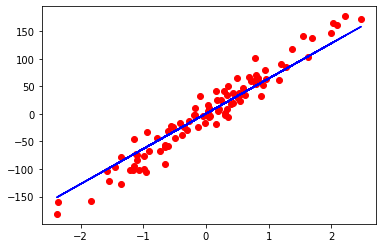

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# Prepare data
X_numpy , y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)


# 2) Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)


# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

### Logistic regression PyTorch

In [54]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test  = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test  = torch.from_numpy(y_test.astype(np.float32))

# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred


model = Model(n_features)


"""
# Using TPU
dev = x.xla_device()
second_dev = x.xla_device(n=2, devkind='TPU')

X_train = X_train.to(second_dev)
y_train = y_train.to(second_dev)
X_test = X_test.to(second_dev)
y_test = y_test.to(second_dev)
model = model.to(second_dev)
"""
# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model.forward(X_train)
    y_pred = torch.flatten(y_pred)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')



y_predicted = model(X_test)
y_predicted_cls = y_predicted.round()
acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.4118
epoch: 20, loss = 0.3608
epoch: 30, loss = 0.3248
epoch: 40, loss = 0.2979
epoch: 50, loss = 0.2769
epoch: 60, loss = 0.2600
epoch: 70, loss = 0.2459
epoch: 80, loss = 0.2340
epoch: 90, loss = 0.2238
epoch: 100, loss = 0.2149
accuracy: 60.1579


### Binary classification using NN

In [53]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F

# Using TPU
dev = x.xla_device()

# Option 1 (create nn modules)
class NeuralNet(nn.Module):
    def __init__(self,input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu    = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        self.softmax = nn.LogSoftmax()

    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.softmax(out)
        return out

input_size = 30
model = NeuralNet(input_size,40,1)


# Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


# Device configuration : Adding to GPU devices
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)
model = model.to(device)


# Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model.forward(X_train)
    y_pred = torch.flatten(y_pred)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


y_predicted = model(X_test)
y_predicted_cls = y_predicted.round()
acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 63.2967
epoch: 20, loss = 63.2967
epoch: 30, loss = 63.2967
epoch: 40, loss = 63.2967
epoch: 50, loss = 63.2967
epoch: 60, loss = 63.2967
epoch: 70, loss = 63.2967
epoch: 80, loss = 63.2967
epoch: 90, loss = 63.2967
epoch: 100, loss = 63.2967
accuracy: 45.0000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


### Dataloader

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = ‘retina’
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import helper

In [ ]:
data_dir = ‘Cat_Dog_data’
#Applying Transformation
train_transforms = transforms.Compose([
                                transforms.RandomRotation(30),
                                transforms.RandomResizedCrop(224),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor()])
test_transforms = transforms.Compose([transforms.Resize(255),
                                      transforms.CenterCrop(224),
                                      transforms.ToTensor()])
train_data = datasets.ImageFolder(data_dir + ‘/train’,  
                                    transform=train_transforms)                                       
test_data = datasets.ImageFolder(data_dir + ‘/test’, 
                                    transform=test_transforms)

#Data Loading
trainloader = torch.utils.data.DataLoader(train_data,
                                                   batch_size=32)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32)

In [ ]:
images, labels = next(iter(dataloader))
helper.imshow(images[0], normalize=False)